# You have to predict the rings of each abalone which will lead us to the age of that abalone. 



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")
%matplotlib inline


In [3]:
path = "https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv"
abalone_data = pd.read_csv(path)
abalone_data.head()
abalone_data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# Data Description



In [4]:
abalone_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [5]:
abalone_data.isnull().sum()


Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [6]:
abalone_data.describe()


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [7]:
abalone_data.shape


(4177, 9)

# TARGET ATTRIBUTE "RING"

In [8]:
abalone_data.Rings.describe()


count    4177.000000
mean        9.933684
std         3.224169
min         1.000000
25%         8.000000
50%         9.000000
75%        11.000000
max        29.000000
Name: Rings, dtype: float64

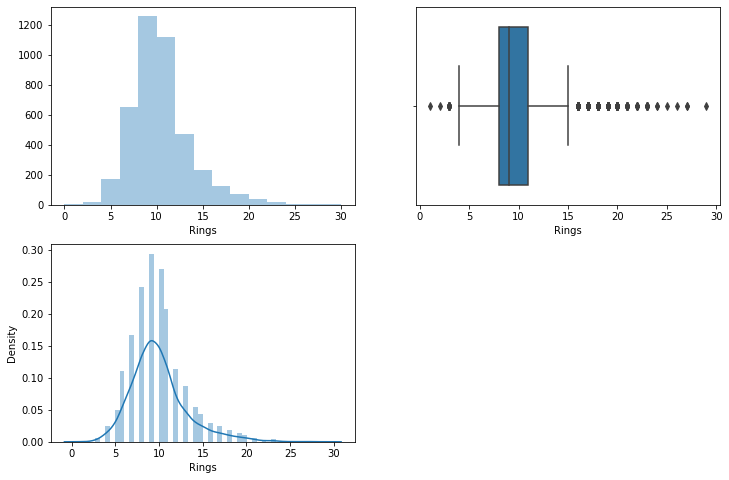

In [9]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(abalone_data['Rings'], kde=False, bins=range(0, 31, 2));
plt.subplot(2,2,2)
sns.boxplot(abalone_data['Rings']);
plt.subplot(2,2,3)
sns.distplot(abalone_data['Rings']);


OUTLIER SHOWING IN RING COLUMN

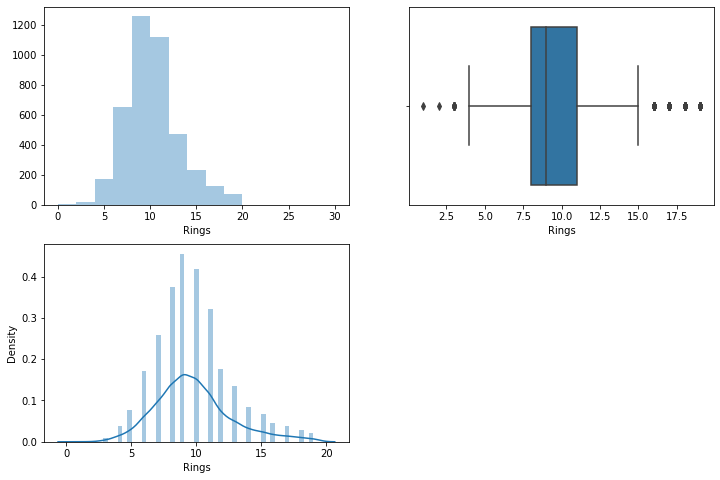

In [10]:
abalone_data = abalone_data[abalone_data['Rings'] < 20]
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(abalone_data['Rings'], kde=False, bins=range(0, 31, 2));
plt.subplot(2,2,2)
sns.boxplot(abalone_data['Rings']);
plt.subplot(2,2,3)
sns.distplot(abalone_data['Rings']);


# Size Attributes


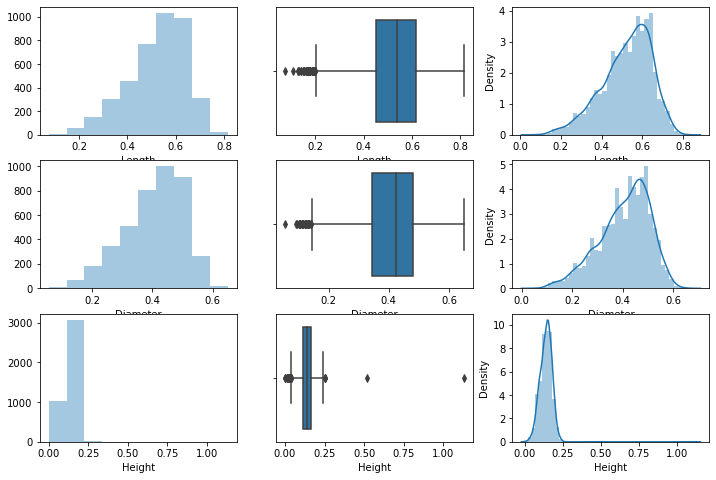

In [11]:
plt.figure(figsize=(12,8))
plt.subplot(3,3,1)
sns.distplot(abalone_data['Length'], kde=False, bins= 10);
plt.subplot(3,3,2)
sns.boxplot(abalone_data['Length']);
plt.subplot(3,3,3)
sns.distplot(abalone_data['Length']);

plt.subplot(3,3,4)
sns.distplot(abalone_data['Diameter'], kde=False, bins = 10);
plt.subplot(3,3,5)
sns.boxplot(abalone_data['Diameter']);
plt.subplot(3,3,6)
sns.distplot(abalone_data['Diameter']);

plt.subplot(3,3,7)
sns.distplot(abalone_data['Height'], kde=False, bins= 10);
plt.subplot(3,3,8)
sns.boxplot(abalone_data['Height']);
plt.subplot(3,3,9)
sns.distplot(abalone_data['Height']);

From the above , we filter these outliers in order to obtain a more realistic visualization of the distribution of the Height attribute:



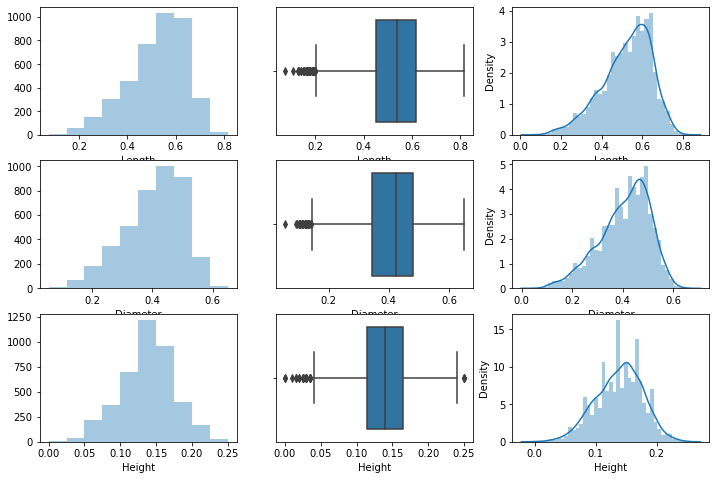

In [12]:
abalone_data = abalone_data[abalone_data['Height'] < 0.4]
plt.figure(figsize=(12,8))
plt.subplot(3,3,1)
sns.distplot(abalone_data['Length'], kde=False, bins= 10);
plt.subplot(3,3,2)
sns.boxplot(abalone_data['Length']);
plt.subplot(3,3,3)
sns.distplot(abalone_data['Length']);

plt.subplot(3,3,4)
sns.distplot(abalone_data['Diameter'], kde=False, bins= 10);
plt.subplot(3,3,5)
sns.boxplot(abalone_data['Diameter']);
plt.subplot(3,3,6)
sns.distplot(abalone_data['Diameter']);

plt.subplot(3,3,7)
sns.distplot(abalone_data['Height'], kde=False, bins = 10);
plt.subplot(3,3,8)
sns.boxplot(abalone_data['Height']);
plt.subplot(3,3,9)
sns.distplot(abalone_data['Height']);


# Weight attributes


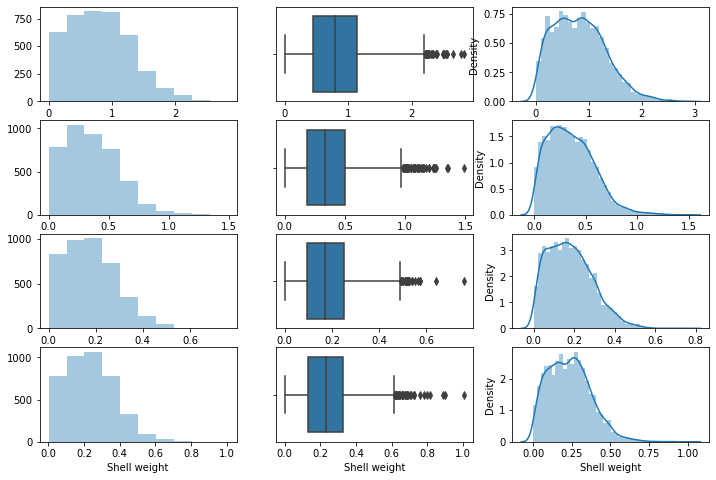

In [13]:
plt.figure(figsize=(12,8))
plt.subplot(4,3,1)
sns.distplot(abalone_data['Whole weight'], kde=False, bins= 10);
plt.subplot(4,3,2)
sns.boxplot(abalone_data['Whole weight']);
plt.subplot(4,3,3)
sns.distplot(abalone_data['Whole weight']);

plt.subplot(4,3,4)
sns.distplot(abalone_data['Shucked weight'], kde=False, bins= 10);
plt.subplot(4,3,5)
sns.boxplot(abalone_data['Shucked weight']);
plt.subplot(4,3,6)
sns.distplot(abalone_data['Shucked weight']);

plt.subplot(4,3,7)
sns.distplot(abalone_data['Viscera weight'], kde=False, bins= 10);
plt.subplot(4,3,8)
sns.boxplot(abalone_data['Viscera weight']);
plt.subplot(4,3,9)
sns.distplot(abalone_data['Viscera weight']);

plt.subplot(4,3,10)
sns.distplot(abalone_data['Shell weight'], kde=False, bins= 10);
plt.subplot(4,3,11)
sns.boxplot(abalone_data['Shell weight']);
plt.subplot(4,3,12)
sns.distplot(abalone_data['Shell weight']);


# SEX Attribute


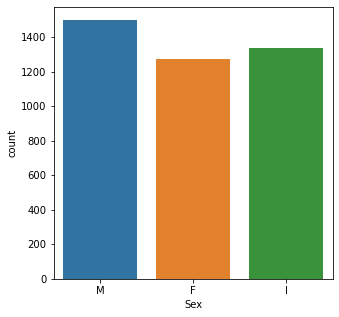

In [14]:
plt.figure(figsize=(5,5))
sns.countplot(abalone_data.Sex);


# Multivariate Analysis


How the independent variables influences the target variable
We need to visualize the correlation matrix in a heatmap

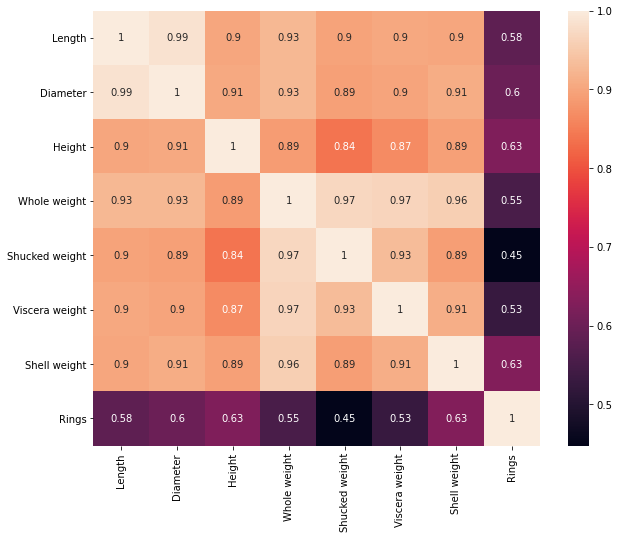

In [15]:
plt.figure(figsize = (10,8))
sns.heatmap(abalone_data.corr(), annot = True);

<Figure size 720x360 with 0 Axes>

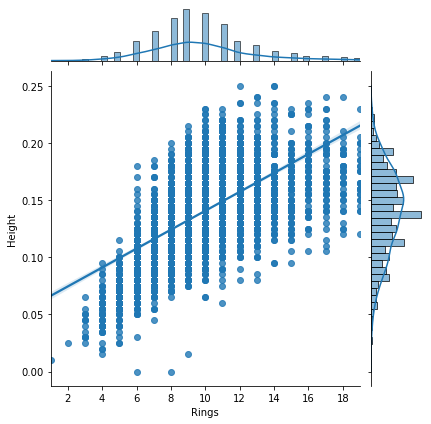

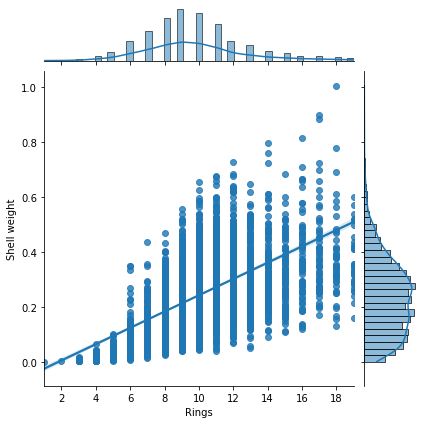

In [16]:
plt.figure(figsize=(10, 5))
sns.jointplot(data=abalone_data, x='Rings', y='Height', kind='reg');
sns.jointplot(data=abalone_data, x='Rings', y='Shell weight', kind='reg');


#Height and Shell weight are the attributes that most correlates to Rings
#Correlation of these two attributes with Rings

# How correlation varies with the number of rings ?


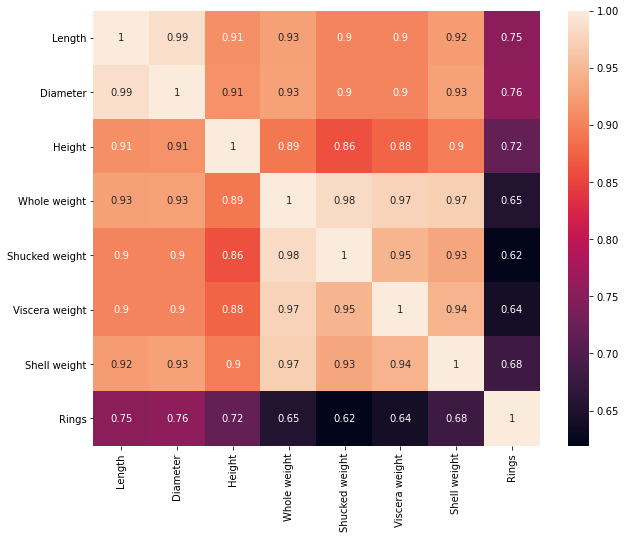

In [17]:
i_abalone = abalone_data[abalone_data['Rings'] < 10]

plt.figure(figsize=(10, 8))
corr = i_abalone.corr()
sns.heatmap(corr, annot=True);


# Lets see the correlation between size attributes and Rings.


<Figure size 1440x360 with 0 Axes>

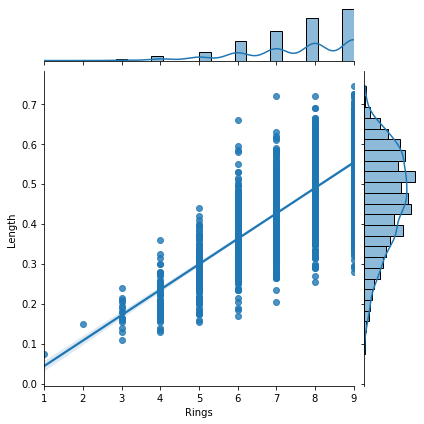

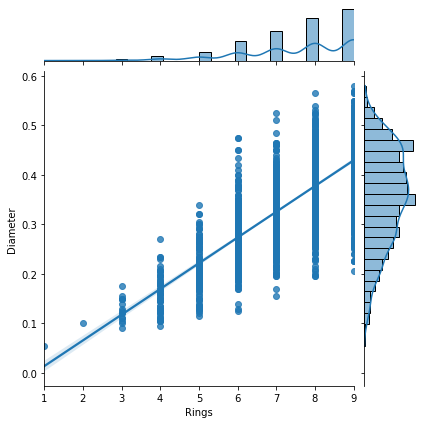

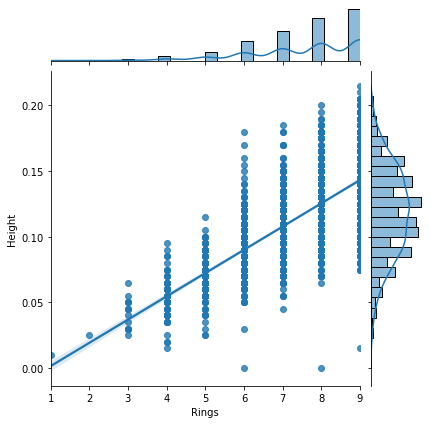

In [18]:
plt.figure(figsize=(20, 5))

sns.jointplot(data=i_abalone, x='Rings', y='Length', kind='reg')
sns.jointplot(data=i_abalone, x='Rings', y='Diameter', kind='reg')
sns.jointplot(data=i_abalone, x='Rings', y='Height', kind='reg')


# The violin plots shows that the median of Size attributes increases as instances are grouped by Rings:


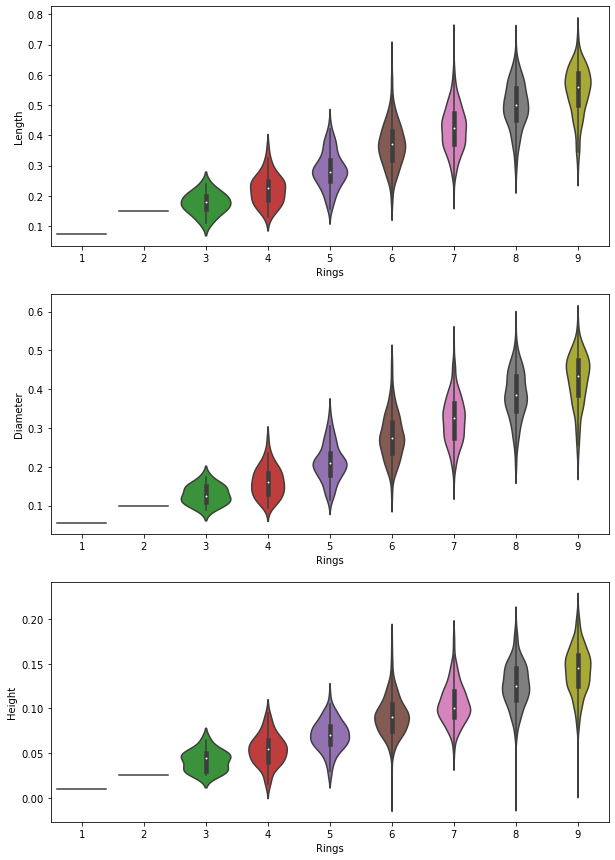

In [19]:
plt.figure(figsize=(10,15))
plt.subplot(3,1,1)
sns.violinplot(data=i_abalone, x='Rings', y='Length')
plt.subplot(3,1,2)
sns.violinplot(data=i_abalone, x='Rings', y='Diameter')
plt.subplot(3,1,3)
sns.violinplot(data=i_abalone, x='Rings', y='Height');


# Comparing Height and Shell weight to Rings:


<Figure size 1440x360 with 0 Axes>

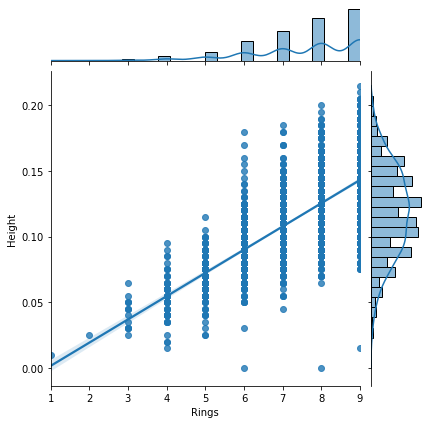

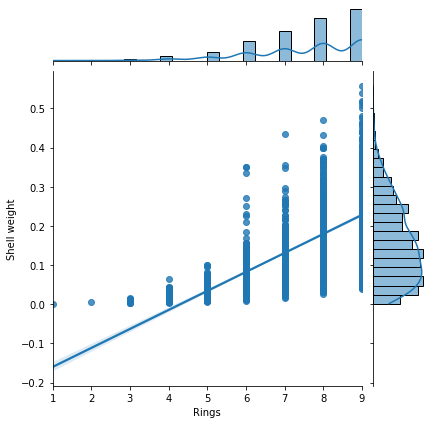

In [20]:
plt.figure(figsize=(20, 5))
sns.jointplot(data=i_abalone, x='Rings', y='Height', kind='reg');
sns.jointplot(data=i_abalone, x='Rings', y='Shell weight', kind='reg');


# With more than 10 Rings we observe that correlation decays drastically to near 0 (zero)


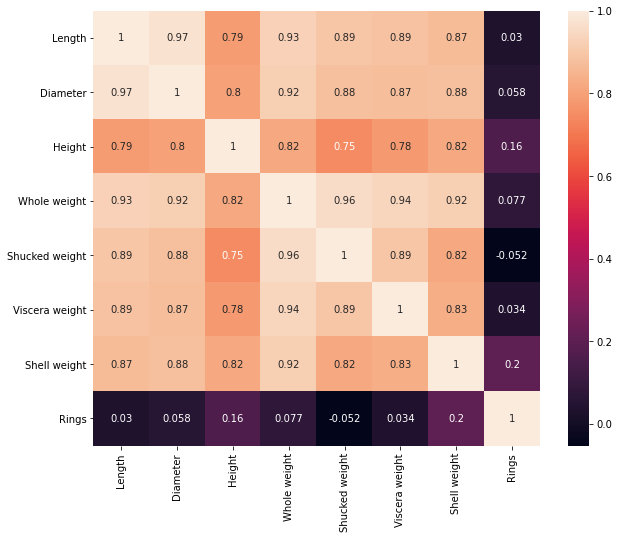

In [21]:
a_abalone = abalone_data[abalone_data['Rings'] >= 10]

plt.figure(figsize=(10, 8))
corr = a_abalone.corr()
sns.heatmap(corr, annot=True);


<Figure size 1440x720 with 0 Axes>

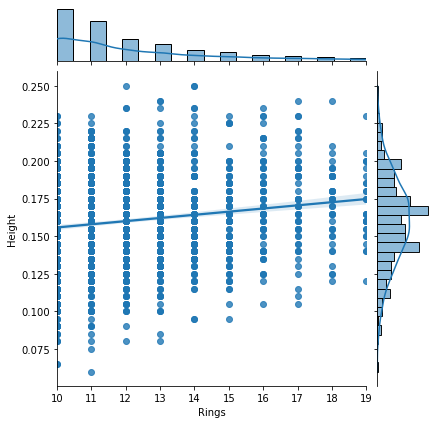

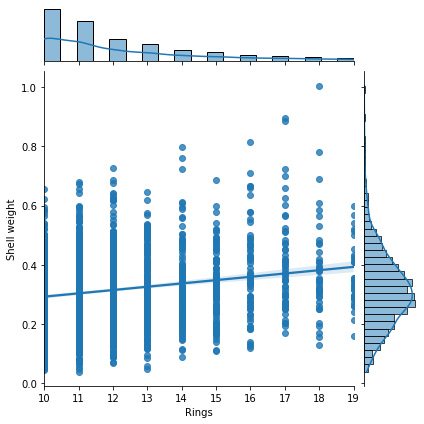

In [22]:
plt.figure(figsize=(20, 10))

sns.jointplot(data=a_abalone, y='Height', x='Rings', kind='reg');
sns.jointplot(data=a_abalone, y='Shell weight', x='Rings', kind='reg');


These results suggest that abalones grows in size and weight until a certain age, near 10 years. After this age their size and age remains stable.



# Influence of Sex on attributes


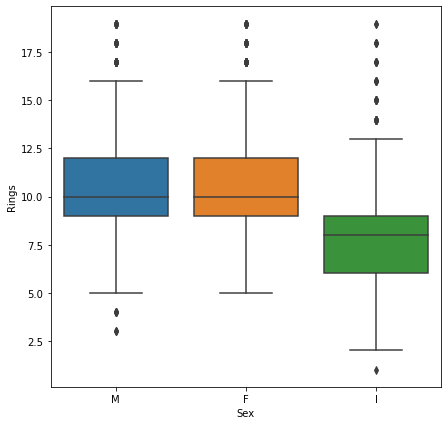

In [23]:
plt.figure(figsize=(7, 7))
sns.boxplot(data=abalone_data, x='Sex', y='Rings');


Infants have lower number of rings as compared to males and females


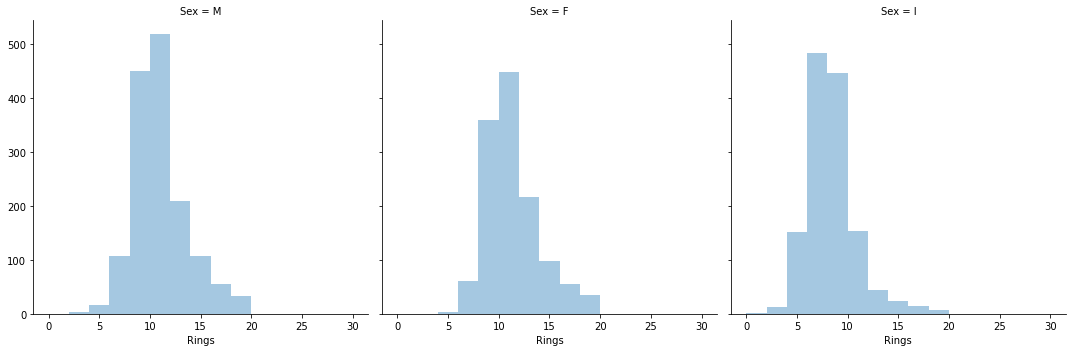

In [24]:
g = sns.FacetGrid(abalone_data, col='Sex', margin_titles=True, size=5)
g.map(sns.distplot, 'Rings', kde=False, bins=range(0, 31, 2));


# For shell height


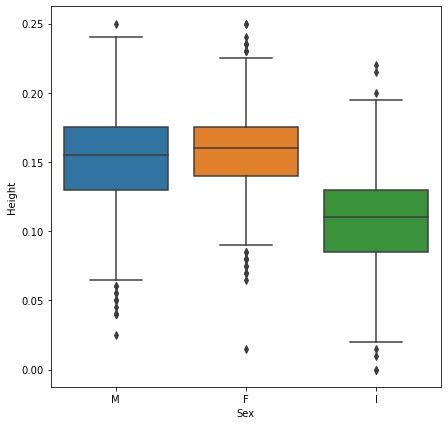

In [26]:
plt.figure(figsize=(7, 7))
sns.boxplot(data=abalone_data, x='Sex', y='Height');


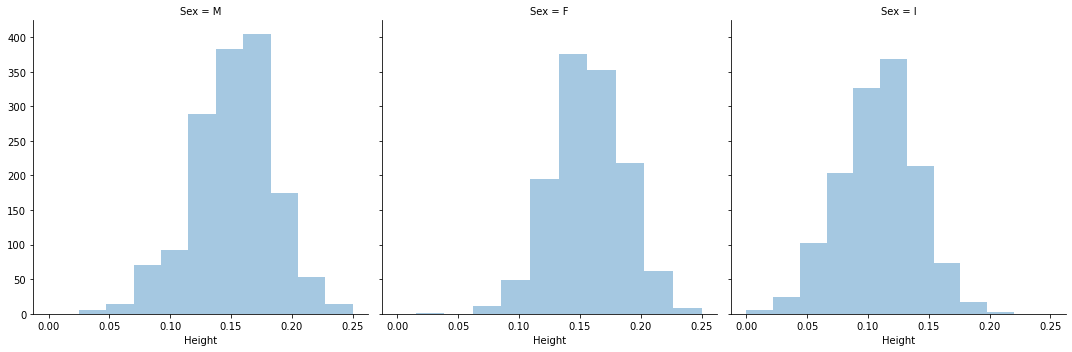

In [27]:
g = sns.FacetGrid(abalone_data, col='Sex', margin_titles=True, size=5)
g.map(sns.distplot, 'Height', kde=False, bins= 10);


Sex categories influence the correlations Rings & Height and Rings & Shell weight
These attributes has stronger correlation for lower values of Rings. Because Infant abalones have lower values of Rings, the consequence is that Height and Shell weight have stronger correlation to rings

# For weight


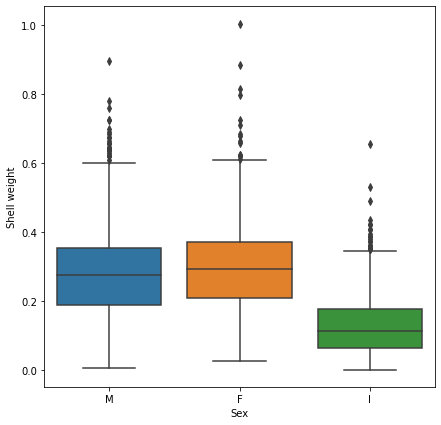

In [28]:
plt.figure(figsize=(7, 7))
sns.boxplot(data=abalone_data, x='Sex', y='Shell weight');


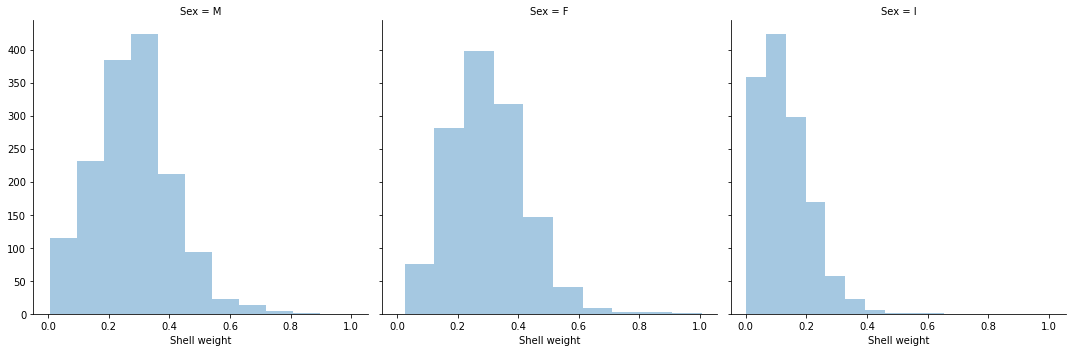

In [29]:
g = sns.FacetGrid(abalone_data, col='Sex', margin_titles=True, size=5)
g.map(sns.distplot, 'Shell weight', kde=False, bins= 10);


<Figure size 1440x360 with 0 Axes>

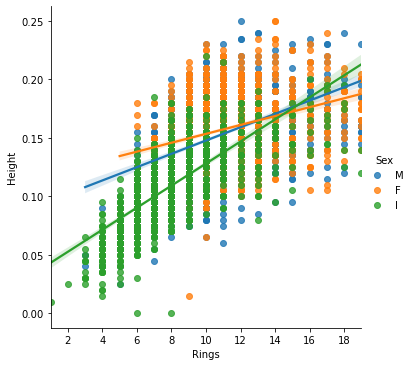

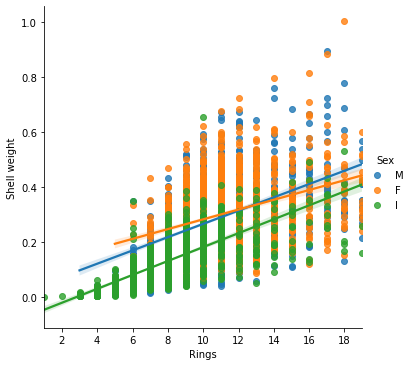

In [30]:
plt.figure(figsize=(20, 5))

sns.lmplot(data=abalone_data, x='Rings', y='Height', hue='Sex', fit_reg=True);
sns.lmplot(data=abalone_data, x='Rings', y='Shell weight', hue='Sex', fit_reg=True);


In [31]:
abalone_data.head()


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


performing categorical variable to numeric variable with label encoder to make uniform data


In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
abalone_data['Sex']= le.fit_transform(abalone_data['Sex'])
abalone_data.head()


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# Outlier detection and removal


# Z score method


In [33]:
from scipy import stats
abalone_data_outlier= abalone_data.copy()
z = np.abs(stats.zscore(abalone_data_outlier))
print(z)

[[1.15333701 0.56301656 0.42029292 ... 0.7175453  0.62731976 1.80439163]
 [1.15333701 1.43643699 1.42790821 ... 1.19762037 1.21207157 0.95003668]
 [1.28745287 0.06085518 0.13389549 ... 0.34720167 0.18875591 0.2614296 ]
 ...
 [1.15333701 0.64313546 0.6880839  ... 0.98786425 0.52756506 0.2614296 ]
 [1.28745287 0.85109271 0.78884542 ... 0.74554064 0.43985228 0.08287394]
 [1.15333701 1.55814735 1.49417613 ... 1.80170581 1.8944224  0.77148101]]


From the above it is difficult to say which data point is an outlier. We will try and define a threshold to identify an outlier.



In [38]:
threshold = 3
print(np.where(z > 3))


(array([   8,   32,   79,  125,  126,  160,  161,  162,  162,  162,  163,
        165,  229,  229,  229,  229,  230,  230,  231,  231,  232,  249,
        268,  283,  300,  320,  342,  342,  348,  355,  407,  419,  457,
        471,  499,  553,  564,  612,  634,  642,  660,  662,  662,  685,
        685,  686,  853,  853,  853, 1010, 1013, 1013, 1014, 1014, 1136,
       1155, 1159, 1161, 1164, 1166, 1168, 1168, 1169, 1169, 1169, 1169,
       1171, 1171, 1219, 1379, 1383, 1387, 1388, 1388, 1388, 1389, 1390,
       1390, 1489, 1715, 1717, 1718, 1720, 1722, 1723, 1723, 1723, 1724,
       1724, 1724, 1782, 1943, 1947, 1948, 2050, 2061, 2073, 2073, 2116,
       2119, 2120, 2128, 2157, 2163, 2228, 2230, 2300, 2314, 2316, 2329,
       2444, 2489, 2568, 2569, 2569, 2569, 2570, 2654, 2655, 2655, 2755,
       2755, 2756, 2756, 2756, 2807, 2808, 2808, 2808, 2952, 2953, 3092,
       3130, 3185, 3259, 3299, 3312, 3320, 3331, 3366, 3366, 3366, 3538,
       3538, 3567, 3652, 3654, 3654, 3654, 3654, 3

In [37]:
print(z[234][8])


1.6386437524970459


In [39]:
abalone_data_outlier= abalone_data_outlier[(z < 3).all(axis=1)]
abalone_data.shape

(4113, 9)

In [40]:
abalone_data_outlier.shape


(3992, 9)

# Separating Input Features and Output Features


In [41]:
X = abalone_data_outlier.drop('Rings', axis = 1)
y = abalone_data_outlier. Rings 


# Splitting the data into Train and Validation Set


In [42]:
# import train_test_split
from sklearn.model_selection import train_test_split
# split the data
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.3, random_state = 42)

# X_train: independent/input feature data for training the model
# y_train: dependent/output feature data for training the model
# X_val: independent/input feature data for testing the model; will be used to predict the output values
# y_val: original dependent/output values of X_test; We will compare this values with our predicted values to check the performance of our built model.


# Building a model


In [43]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()


# Train the model


In [44]:
rfr.fit(X_train, y_train)


RandomForestRegressor()

# Predict on the validation data (X_val)


In [45]:
pred = rfr.predict(X_val)


# Model Evaluation


In [46]:
from sklearn.metrics import mean_squared_error
print('Root Mean Squared Error is: ', np.sqrt(mean_squared_error(y_val, pred)))


Root Mean Squared Error is:  1.8879841693473431
